In [1]:
! pip install git+https://github.com/m0hssn/RLForge.git

  Cloning https://github.com/m0hssn/RLForge.git to /tmp/pip-req-build-rk5brztm
  Running command git clone --filter=blob:none --quiet https://github.com/m0hssn/RLForge.git /tmp/pip-req-build-rk5brztm
  Resolved https://github.com/m0hssn/RLForge.git to commit 35f6d4770edff3811207a5684acde7c2d3092b22
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 16.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for rlforge: filename=rlforge-0.1.0-py3-none-any.whl size=7261 sha256=d55ffccce09161fb600d884d09297c755e7848355fdb91685ebdf5ed935a2653
  Stored in directory: /tmp/pip-ephem-wheel-cache-qeayji2m/wheels/3b/b4/26/1119966299b8a95f57b96ab89b177980206a3cbe5fccfb596b
Successfully built rlforge
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.0
    Uninstalling gymnasium-0.29.0:
      Successfully uninstalled gymnasium-0.29.0
ERRO

In [2]:
! pip install swig
! pip install "gymnasium[box2d]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 86.6 MB/s eta 0:00:00:00:010:01
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=495617 sha256=42e2c5304bb5a381dddc08d2bfee29dd1ad840fb24c57f1d8ed3e37173c6eeb4
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [3]:
from rlforge.agents.rl_agent import RLAgent
from rlforge.action_representations import action_representations
from rlforge.policies.policies import DeepQLearner
from rlforge.replay_buffers.replay_buffer import ReplayBuffer
from rlforge.utils.environments.gym_environment import GymEnvironment
from rlforge.training.trainer import Trainer

In [5]:
env = GymEnvironment("LunarLander-v3")
num_actions = env.action_space.n

agent = RLAgent(
    policy_learner=DeepQLearner(
        state_dim=env.observation_space.shape[0],
        action_space=env.action_space,
        hidden_dims=[128, 128],
        training_rounds=50,
        action_representation=action_representations.OneHotActionRepresentation(num_actions=num_actions),
    ),
    replay_buffer=ReplayBuffer(20_000),
)

observation, action_space = env.reset()
agent.reset(observation, action_space)

trainer = Trainer(env, agent, final_epsilon=0)
trainer.train()

Episode 10/1000 - Total Reward: -87.51864624023438 - Epsilon: 0.95
Episode 20/1000 - Total Reward: -260.9247131347656 - Epsilon: 0.90
Episode 30/1000 - Total Reward: -82.21762084960938 - Epsilon: 0.86
Episode 40/1000 - Total Reward: -56.71352005004883 - Epsilon: 0.82
Episode 50/1000 - Total Reward: -47.15077590942383 - Epsilon: 0.78
Episode 60/1000 - Total Reward: -138.77804565429688 - Epsilon: 0.74
Episode 70/1000 - Total Reward: -56.88379669189453 - Epsilon: 0.70
Episode 80/1000 - Total Reward: -2.9287872314453125 - Epsilon: 0.67
Episode 90/1000 - Total Reward: -62.262821197509766 - Epsilon: 0.64
Episode 100/1000 - Total Reward: -6.0006103515625 - Epsilon: 0.61
Episode 110/1000 - Total Reward: -67.04762268066406 - Epsilon: 0.58
Episode 120/1000 - Total Reward: -45.07538604736328 - Epsilon: 0.55
Episode 130/1000 - Total Reward: -60.87990951538086 - Epsilon: 0.52
Episode 140/1000 - Total Reward: -9.093048095703125 - Epsilon: 0.50
Episode 150/1000 - Total Reward: -28.371734619140625 - E

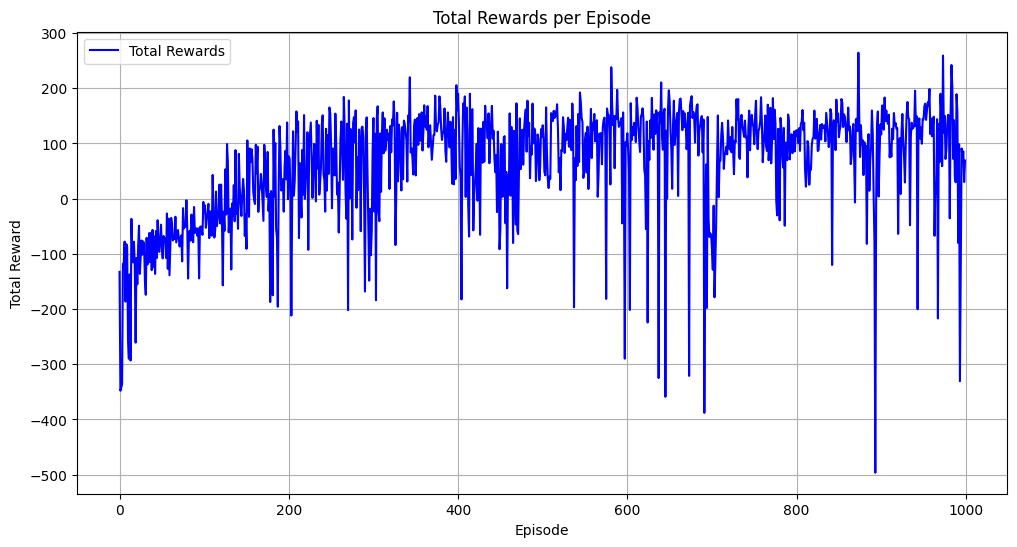

In [8]:
import matplotlib.pyplot as plt

total_rewards = trainer.total_rewards 
plt.figure(figsize=(12, 6))
plt.plot(total_rewards, label='Total Rewards', color='blue')
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid()
plt.legend()
plt.show()